<a href="https://colab.research.google.com/github/zainali78690/IBM-Course/blob/main/CNN_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
import keras.utils as image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 



In [24]:
img1 = ("/content/Rose.jpg")
img2 = ('/content/Dog.jpg')
img3 = ('/content/Apple.jpg')
imgs = [img1, img2, img3]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(3):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 3)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

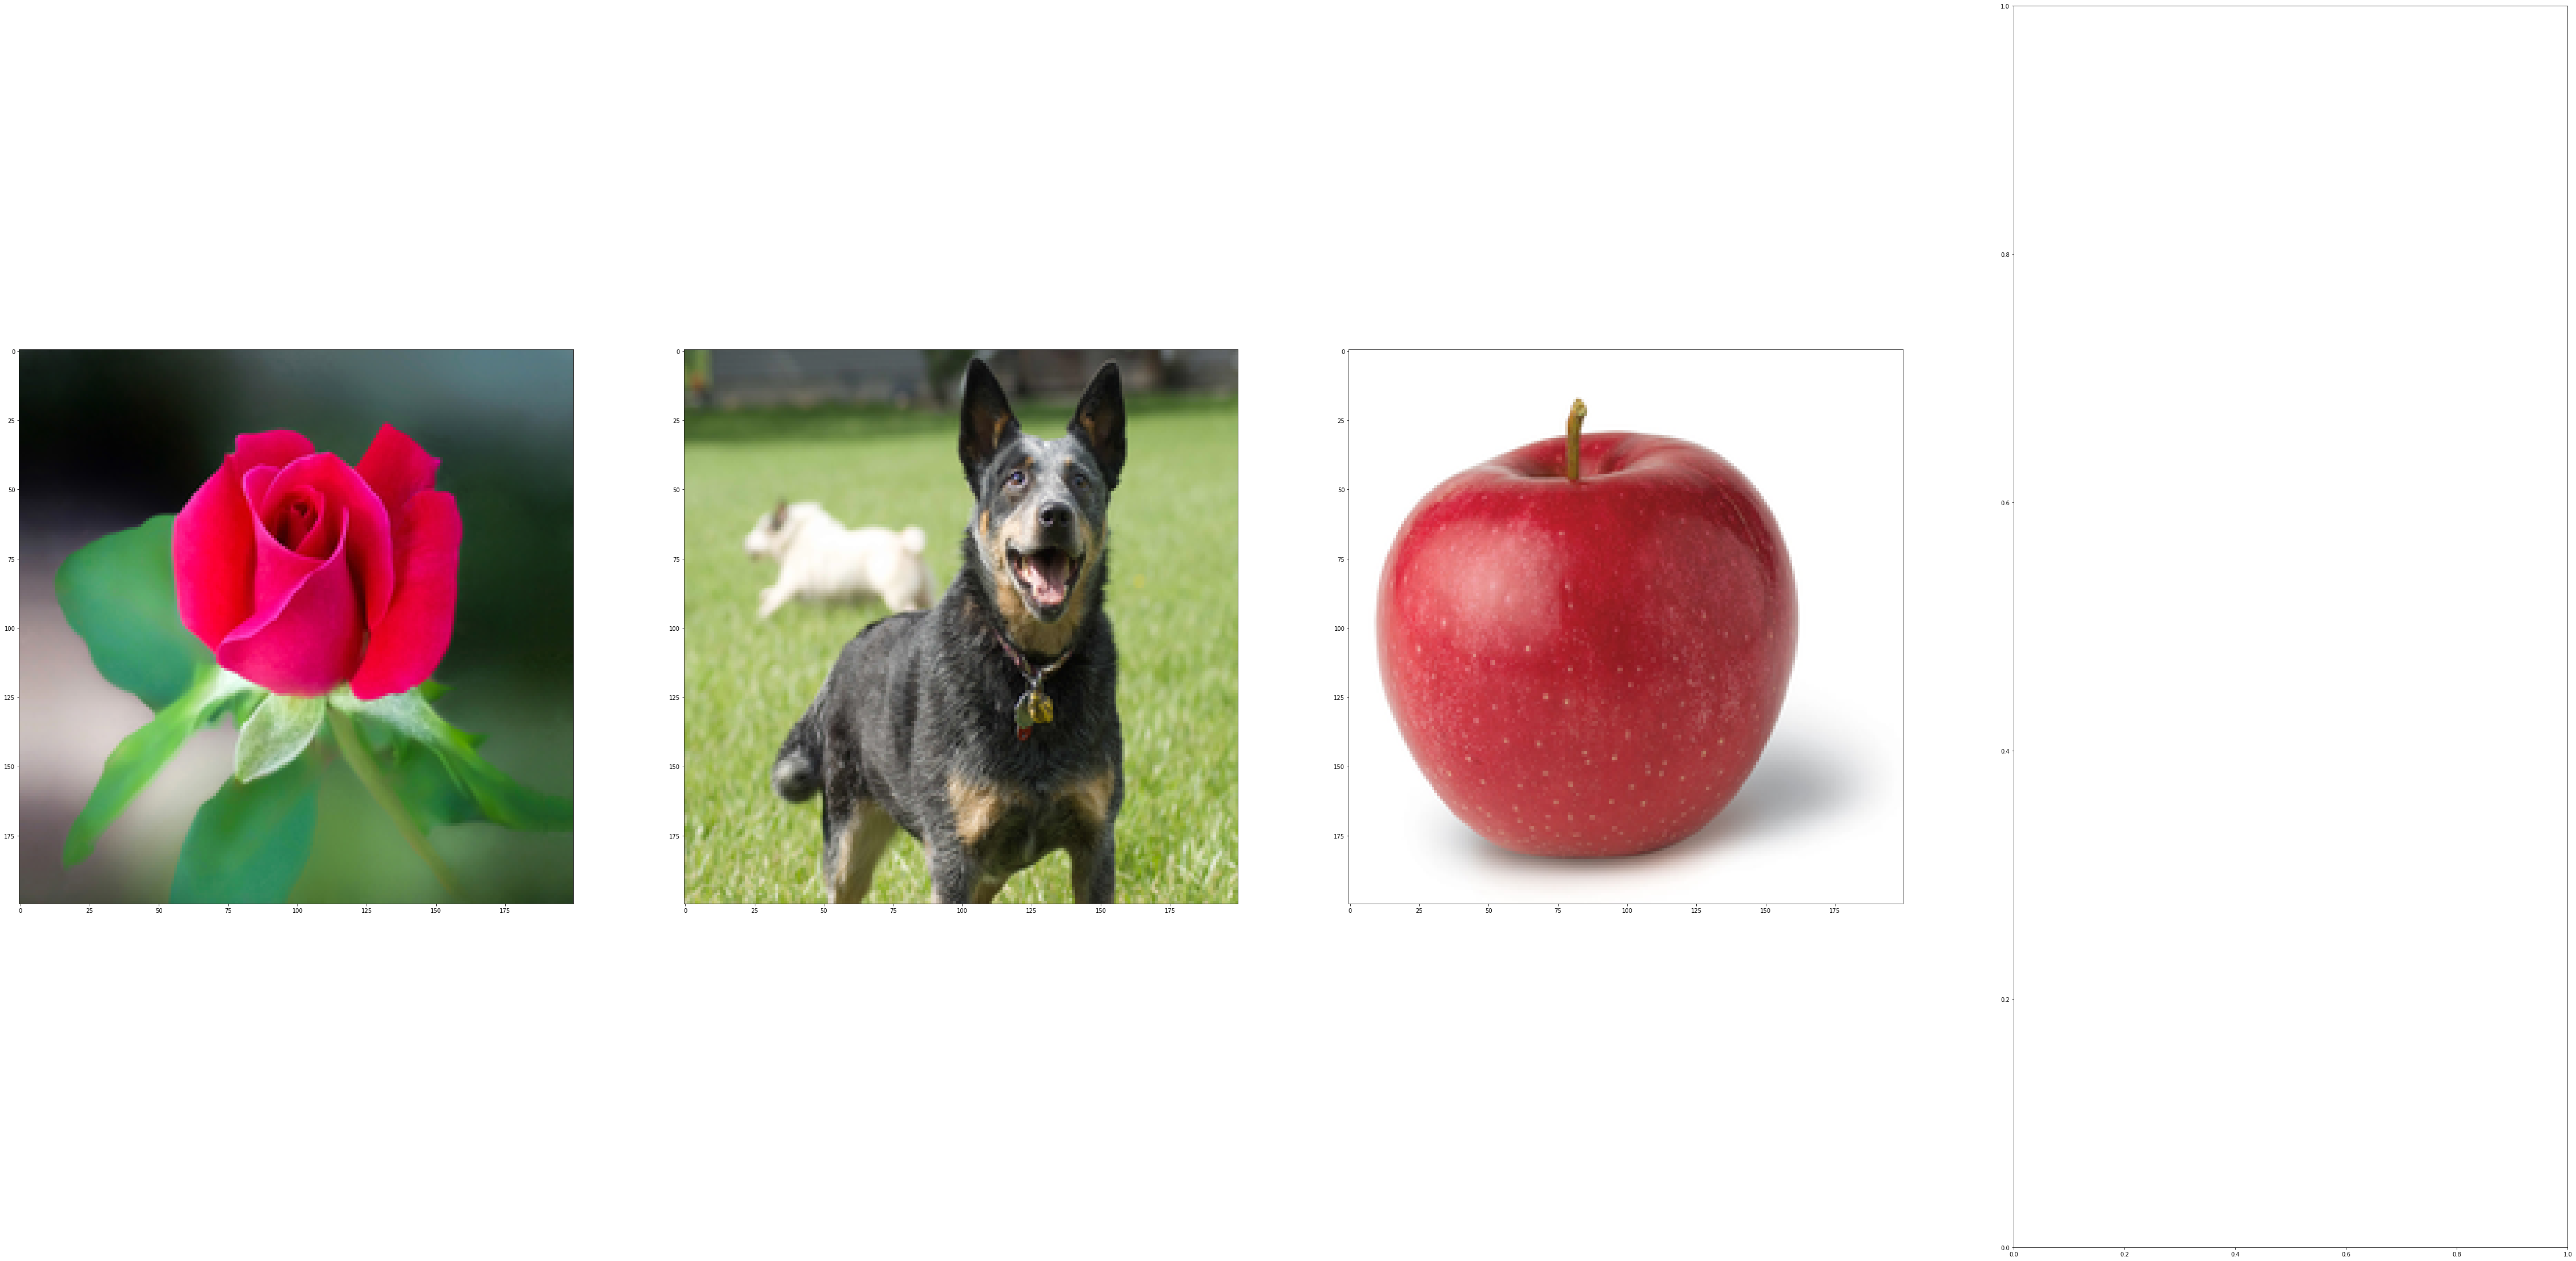

1/1 [==============================] - 1s 596ms/step


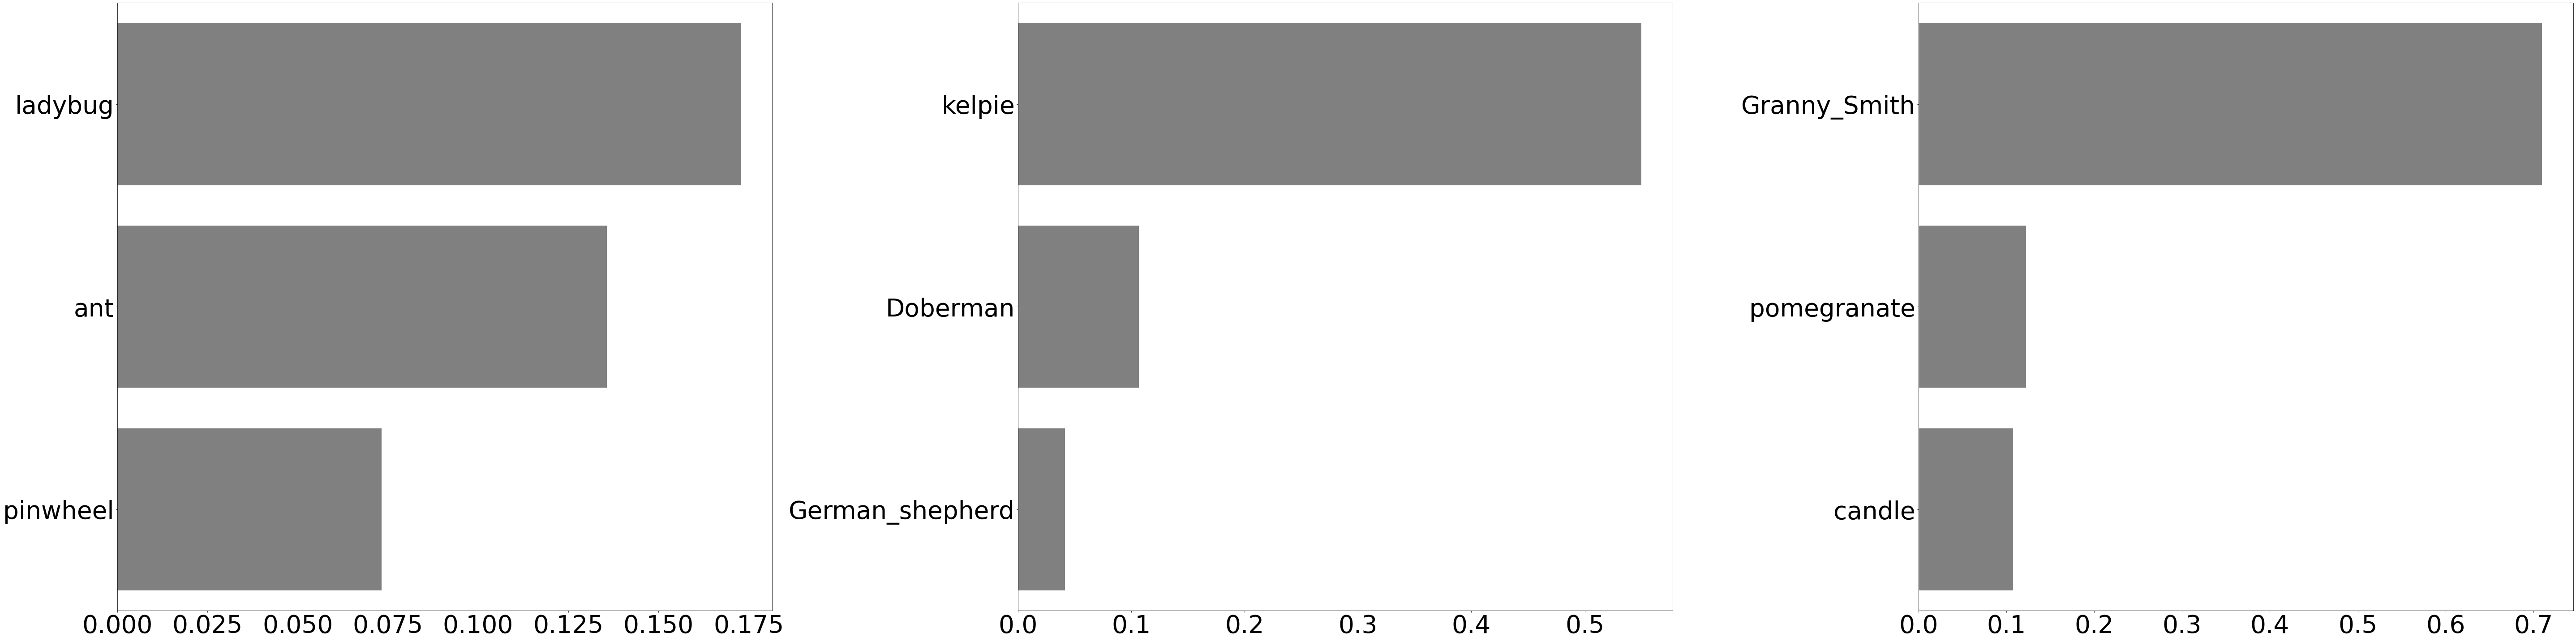

In [15]:
from keras.applications.vgg16 import VGG16
vgg16_weights = 'imagenet'
vgg16_model = VGG16(weights=vgg16_weights)
_get_predictions(vgg16_model)

102967424/102967424 [==============================] - 3s 0us/step


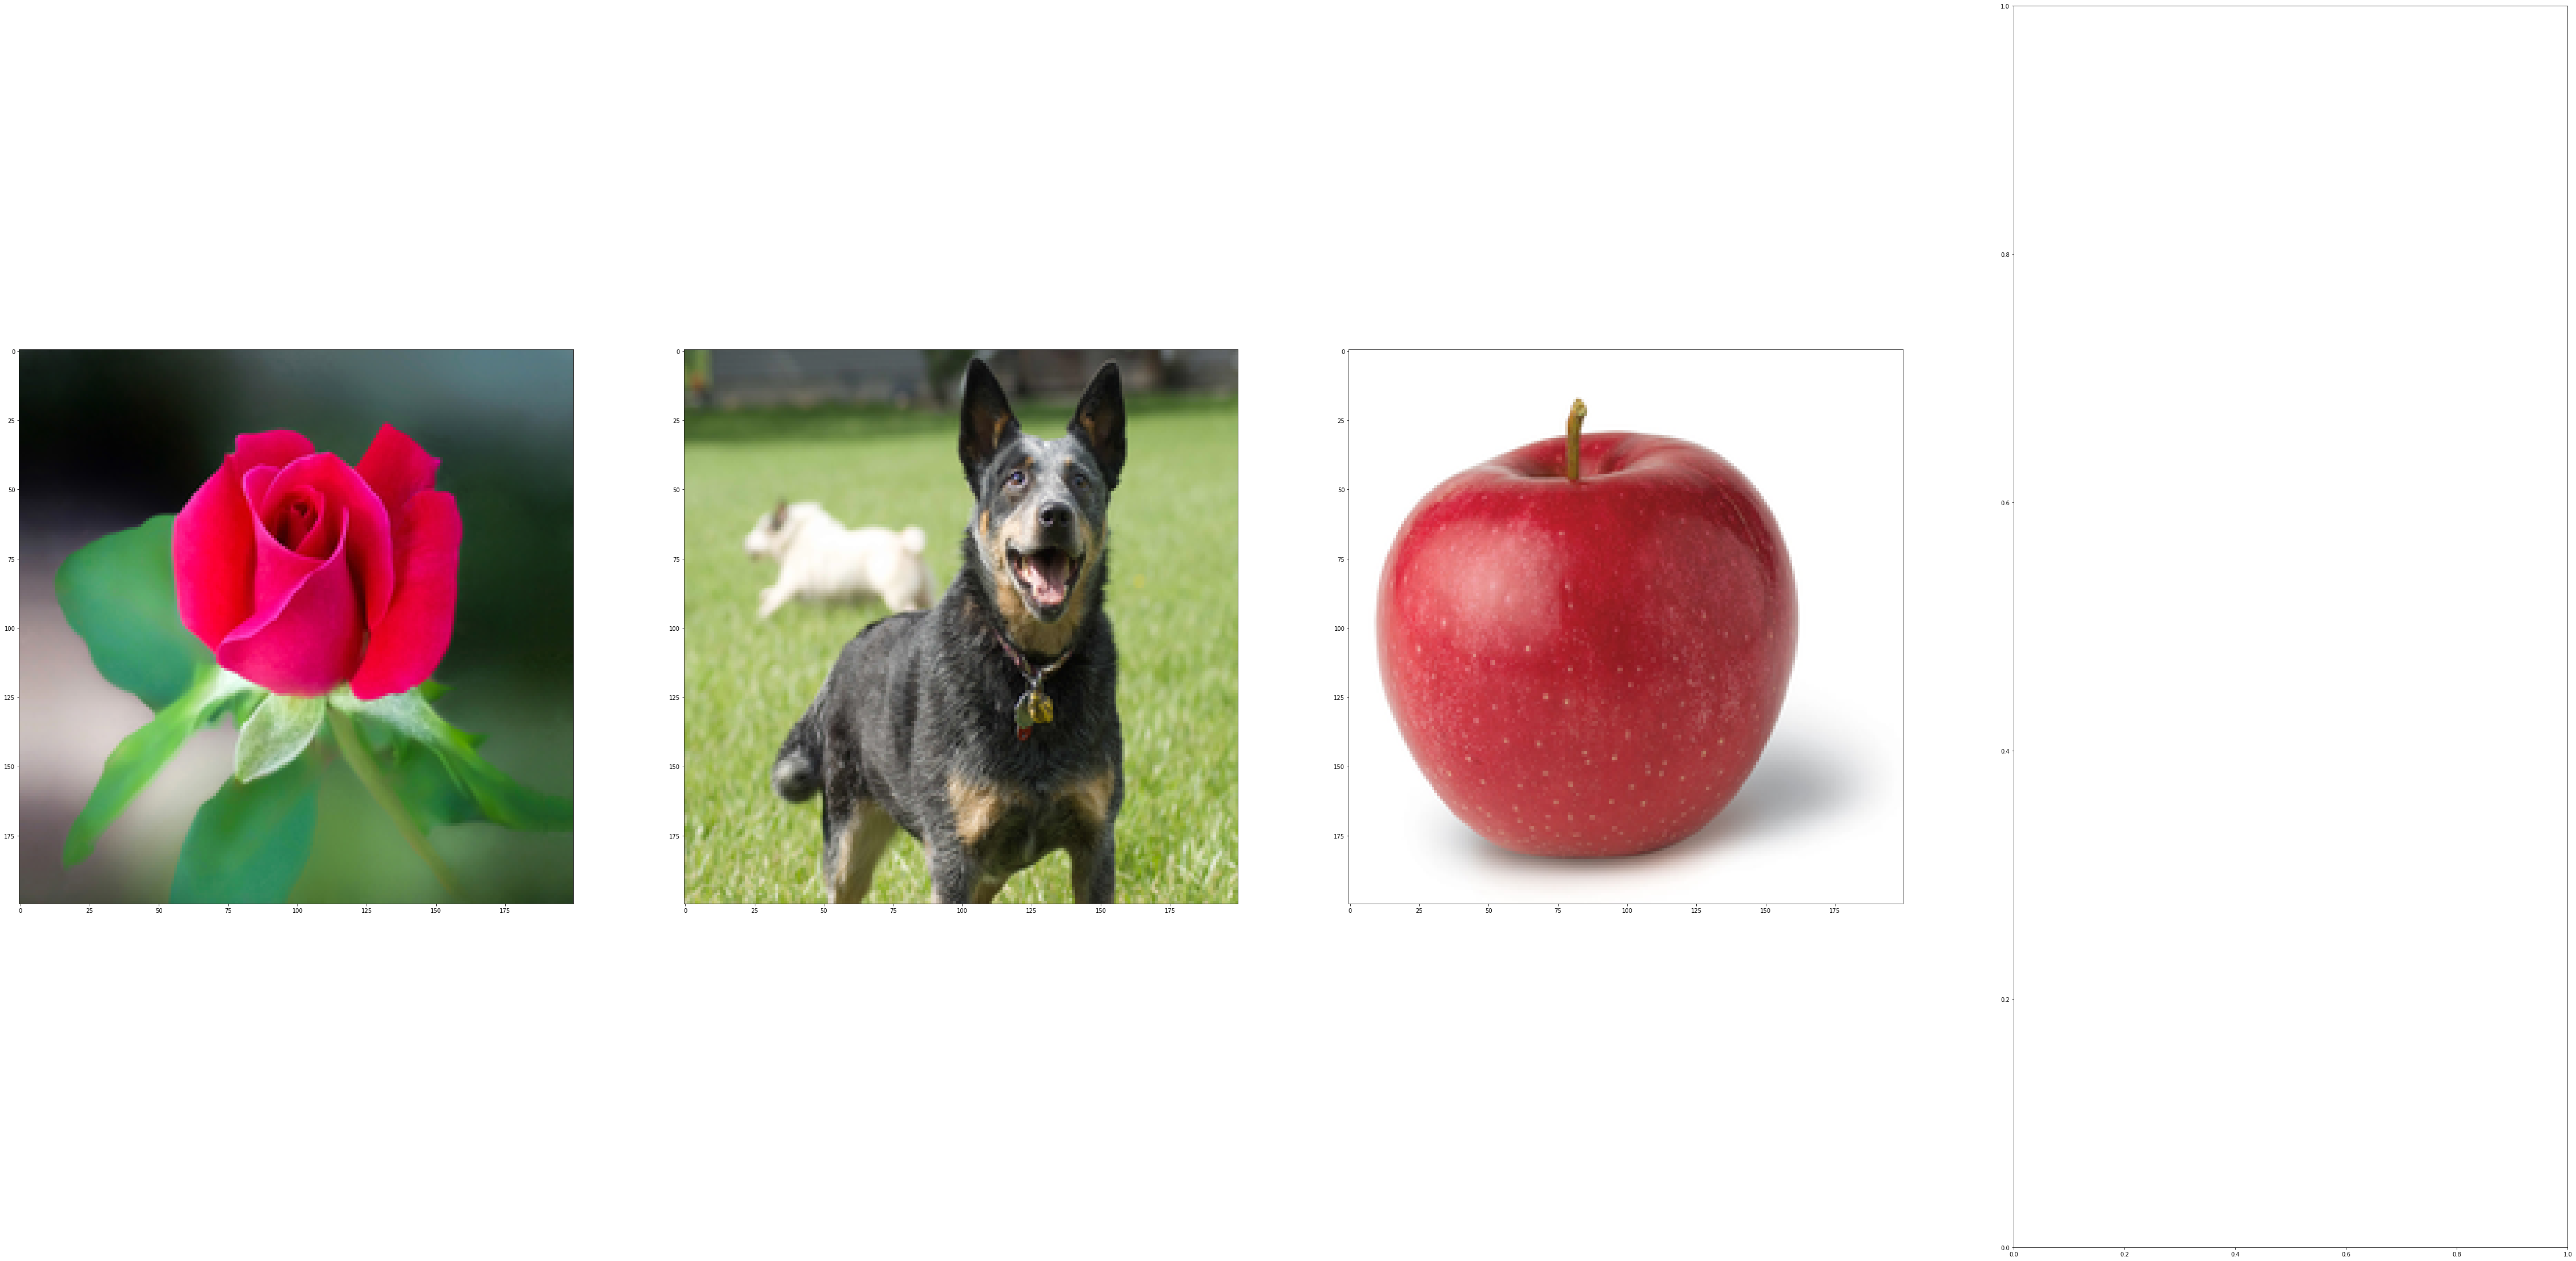

1/1 [==============================] - 0s 250ms/step


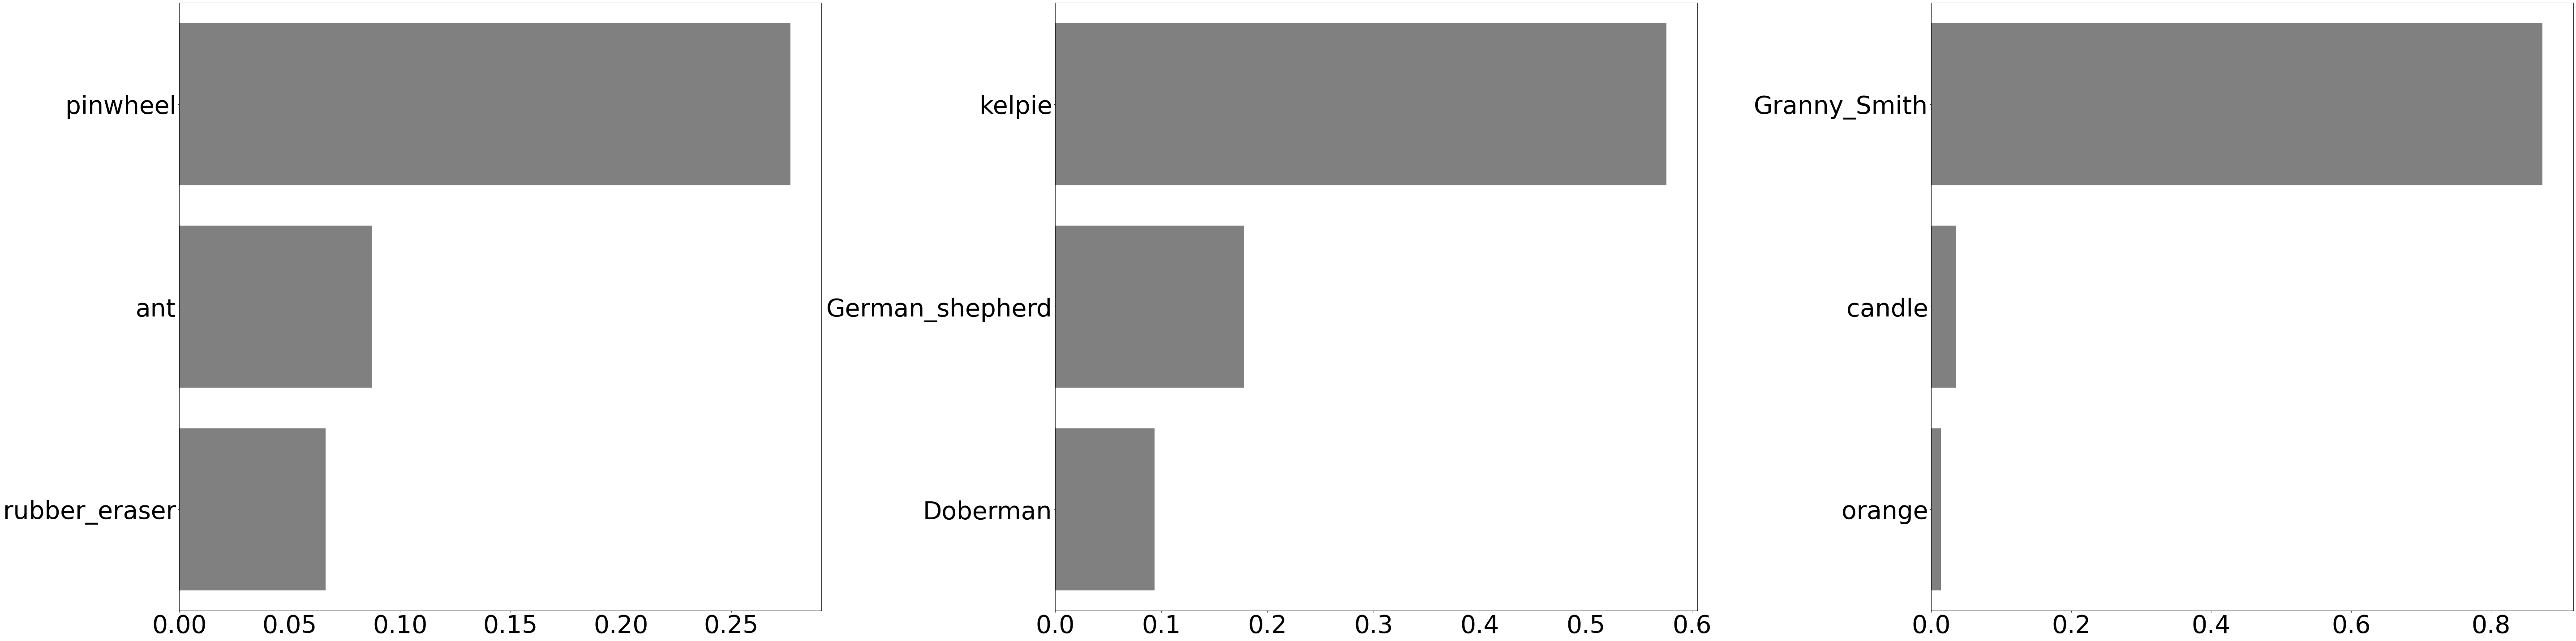

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet_weights = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
resnet_model = ResNet50(weights='imagenet')
_get_predictions(resnet_model)

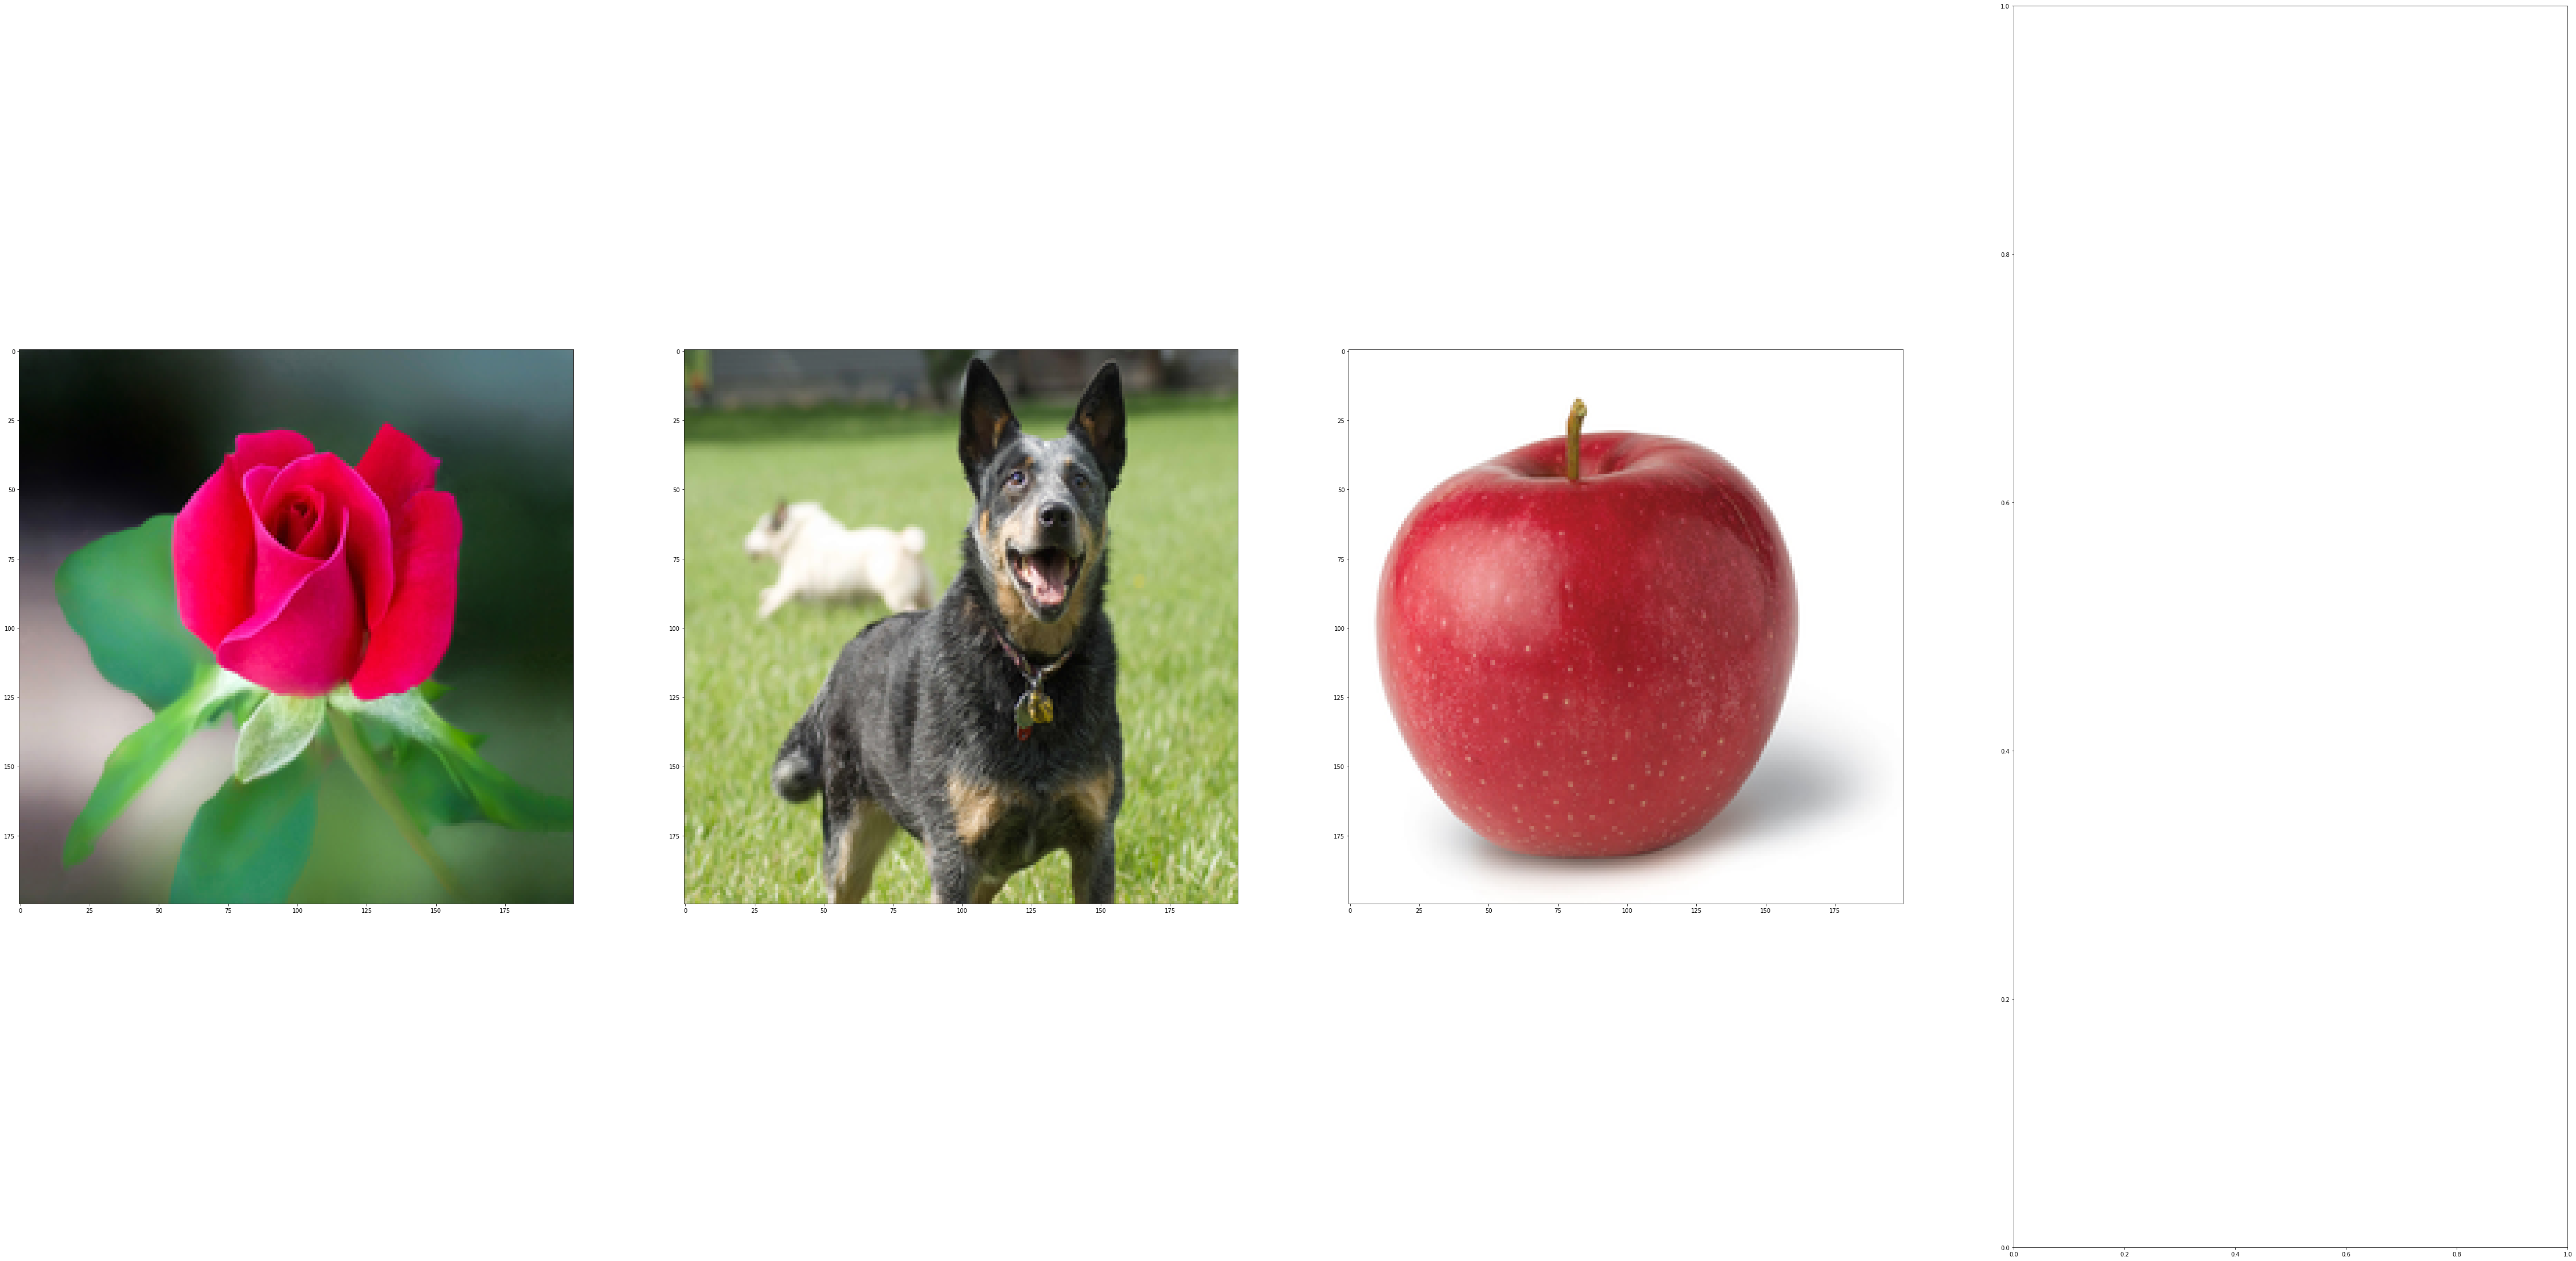

1/1 [==============================] - 0s 287ms/step


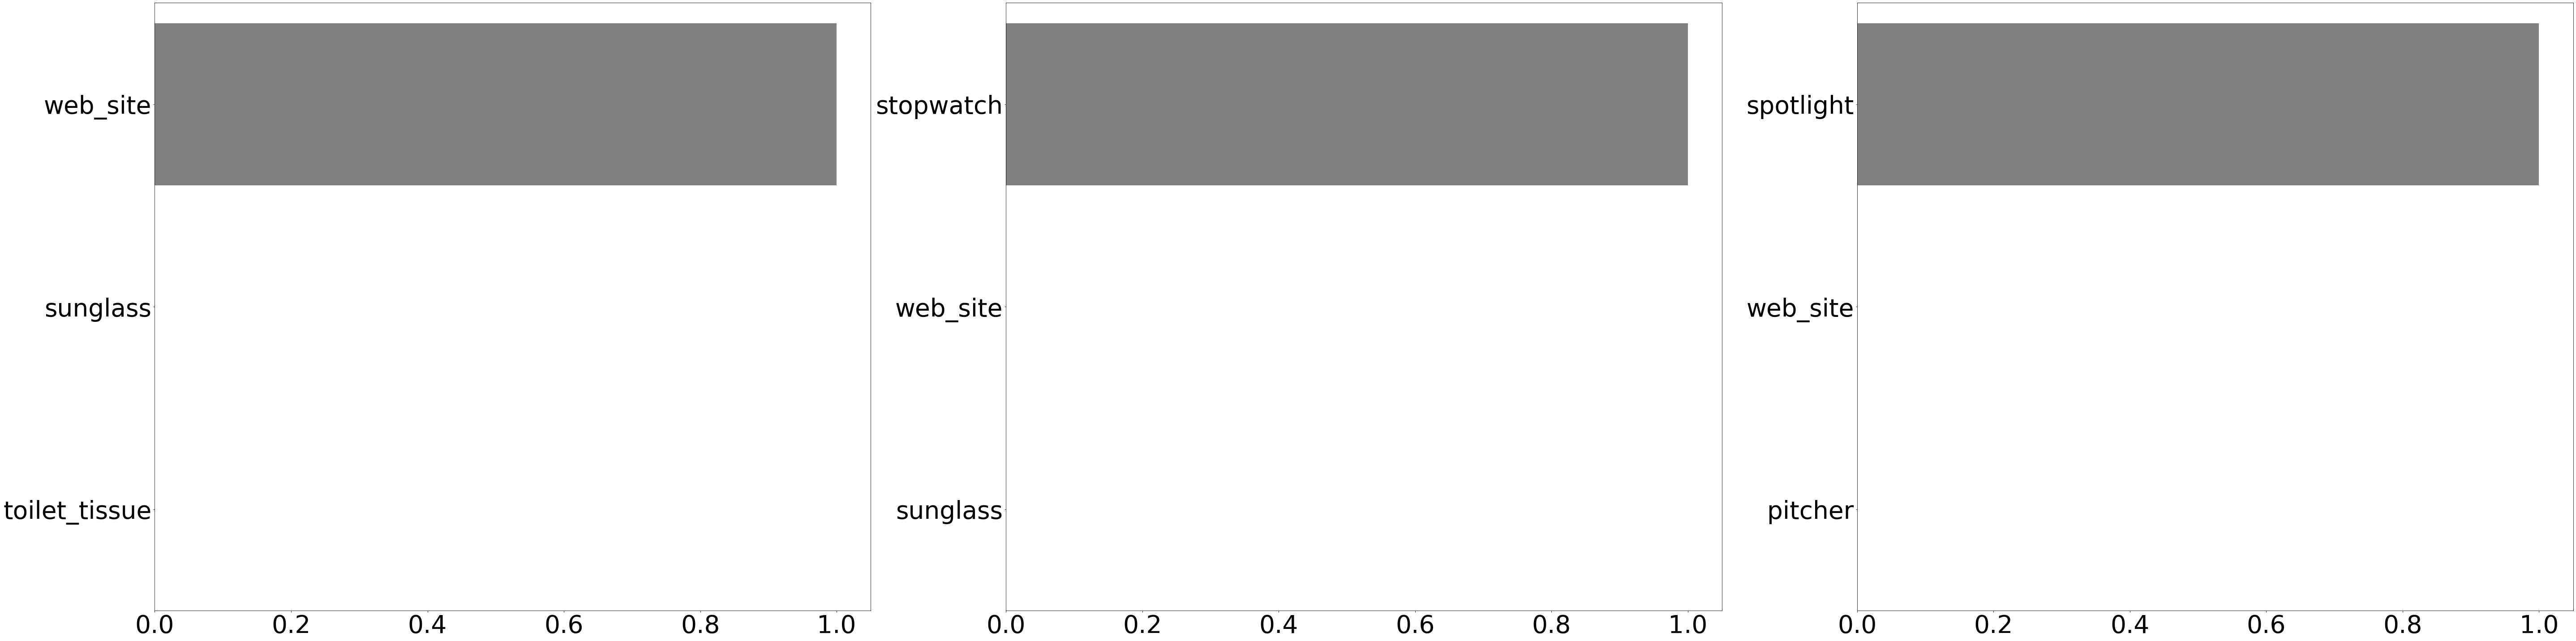

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception_model = InceptionV3(input_shape=(299,299,3),weights='imagenet',include_top=True,)
_get_predictions(inception_model)